In [2]:
# Load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
import ace_tools_open as tools

In [3]:
# Load the data
df_Soc_Dem = pd.read_excel('DataScientist_CaseStudy_Dataset.xlsx', sheet_name='Soc_Dem')
df_Products_ActBalance = pd.read_excel('DataScientist_CaseStudy_Dataset.xlsx', sheet_name='Products_ActBalance')
df_Inflow_Outflow = pd.read_excel('DataScientist_CaseStudy_Dataset.xlsx', sheet_name='Inflow_Outflow')
df_Sales_Revenues = pd.read_excel('DataScientist_CaseStudy_Dataset.xlsx', sheet_name='Sales_Revenues')

In [4]:
df_Soc_Dem

,Client,Sex,Age,Tenure
0,909,M,21,27
1,1217,M,38,165
2,850,F,49,44
3,1473,M,54,34
4,1038,M,29,106
5,225,M,14,187
6,699,M,37,175
7,827,M,57,50
8,1231,F,6,232
9,528,F,19,70


In [5]:
df_Products_ActBalance

,Client,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,1,1,NaN,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.000000,NaN,NaN
1,2,1,1.0,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
2,3,1,NaN,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
3,4,1,1.0,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN
4,5,1,1.0,NaN,NaN,NaN,NaN,5353.483929,8079.715714,NaN,NaN,NaN,NaN
5,6,1,NaN,NaN,NaN,NaN,1.0,4.297143,NaN,NaN,NaN,NaN,1982.071071
6,7,1,NaN,NaN,NaN,NaN,NaN,879.685000,NaN,NaN,NaN,NaN,NaN
7,8,1,NaN,NaN,1.0,NaN,NaN,0.000000,NaN,NaN,326.969286,NaN,NaN
8,9,1,NaN,NaN,1.0,NaN,NaN,510.166429,NaN,NaN,0.000000,NaN,NaN
9,10,1,1.0,NaN,NaN,NaN,NaN,253.458929,116.709286,NaN,NaN,NaN,NaN


In [6]:
df_Inflow_Outflow

,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0
5,1360,1.475357,0.035714,4,1,113.750000,112.321429,0.000000,0.000000,108.000000,7,5,0,0,3
6,267,648.779643,648.779643,2,2,199.810714,199.810714,35.714286,130.846429,31.500000,12,12,1,7,2
7,284,1650.641786,1650.641786,2,2,1661.767500,1661.767500,175.000000,547.982500,597.571429,20,20,1,9,7
8,1420,1075.023214,1075.023214,2,2,620.374643,620.374643,0.000000,0.000000,616.981786,7,7,0,0,6
9,1024,178.579643,178.579643,2,2,109.107143,109.107143,107.142857,0.000000,0.000000,3,3,2,0,0


In [7]:
df_Sales_Revenues

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1094,0,1,0,0.000000,5.138571,0.000000
1,1484,1,0,1,25.609107,0.000000,8.722500
2,20,0,1,0,0.000000,3.822500,0.000000
3,1193,0,0,0,0.000000,0.000000,0.000000
4,142,0,0,0,0.000000,0.000000,0.000000
5,865,0,0,1,0.000000,0.000000,7.535714
6,672,0,1,0,0.000000,1.964286,0.000000
7,942,0,1,0,0.000000,36.785714,0.000000
8,184,0,1,0,0.000000,5.785714,0.000000
9,1513,0,0,1,0.000000,0.000000,13.315714


# Exploratory data analysis

In [8]:
# Merge the data and create train and test sets
df = pd.merge(pd.merge(df_Soc_Dem, df_Products_ActBalance, on='Client'), df_Inflow_Outflow, on='Client', how='left')

In [9]:
df.dtypes

Client                            int64
Sex                              object
Age                               int64
Tenure                            int64
Count_CA                          int64
Count_SA                        float64
Count_MF                        float64
Count_OVD                       float64
Count_CC                        float64
Count_CL                        float64
ActBal_CA                       float64
ActBal_SA                       float64
ActBal_MF                       float64
ActBal_OVD                      float64
ActBal_CC                       float64
ActBal_CL                       float64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                float64
TransactionsCred_CA             float64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64


In [10]:
# Check rate of NA values
df.isna().mean() * 100

Client                           0.000000
Sex                              0.185759
Age                              0.000000
Tenure                           0.000000
Count_CA                         0.000000
Count_SA                        73.622291
Count_MF                        81.052632
Count_OVD                       74.055728
Count_CC                        89.473684
Count_CL                        91.640867
ActBal_CA                        0.000000
ActBal_SA                       73.622291
ActBal_MF                       81.052632
ActBal_OVD                      74.055728
ActBal_CC                       89.473684
ActBal_CL                       91.640867
VolumeCred                       1.733746
VolumeCred_CA                    1.733746
TransactionsCred                 1.733746
TransactionsCred_CA              1.733746
VolumeDeb                        1.733746
VolumeDeb_CA                     1.733746
VolumeDebCash_Card               1.733746
VolumeDebCashless_Card           1

In [11]:
# Remove rows with unknown gender and replace 'M' and 'F' with an integer
df.dropna(subset=['Sex'], inplace=True)
df.Sex.replace({'M':int(1), 'F':int(2)}, inplace=True)

In [12]:
df.dtypes

Client                            int64
Sex                               int64
Age                               int64
Tenure                            int64
Count_CA                          int64
Count_SA                        float64
Count_MF                        float64
Count_OVD                       float64
Count_CC                        float64
Count_CL                        float64
ActBal_CA                       float64
ActBal_SA                       float64
ActBal_MF                       float64
ActBal_OVD                      float64
ActBal_CC                       float64
ActBal_CL                       float64
VolumeCred                      float64
VolumeCred_CA                   float64
TransactionsCred                float64
TransactionsCred_CA             float64
VolumeDeb                       float64
VolumeDeb_CA                    float64
VolumeDebCash_Card              float64
VolumeDebCashless_Card          float64
VolumeDeb_PaymentOrder          float64


In [13]:
# Fill NA values with 0 (assuming missing indicates no holdings or activities or purchases)
df.fillna(0, inplace=True)

In [14]:
df.isna().mean() * 100

Client                          0.0
Sex                             0.0
Age                             0.0
Tenure                          0.0
Count_CA                        0.0
Count_SA                        0.0
Count_MF                        0.0
Count_OVD                       0.0
Count_CC                        0.0
Count_CL                        0.0
ActBal_CA                       0.0
ActBal_SA                       0.0
ActBal_MF                       0.0
ActBal_OVD                      0.0
ActBal_CC                       0.0
ActBal_CL                       0.0
VolumeCred                      0.0
VolumeCred_CA                   0.0
TransactionsCred                0.0
TransactionsCred_CA             0.0
VolumeDeb                       0.0
VolumeDeb_CA                    0.0
VolumeDebCash_Card              0.0
VolumeDebCashless_Card          0.0
VolumeDeb_PaymentOrder          0.0
TransactionsDeb                 0.0
TransactionsDeb_CA              0.0
TransactionsDebCash_Card    

[]

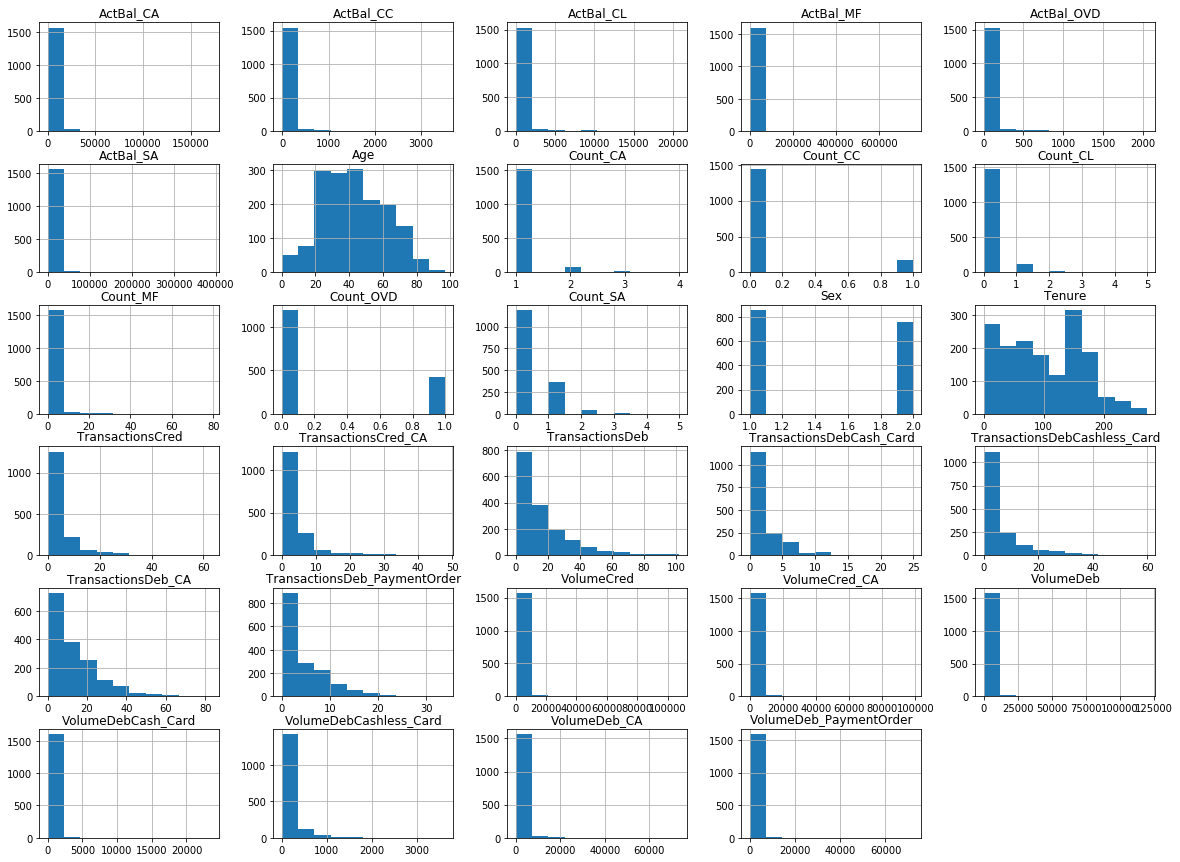

In [15]:
df.drop(['Client'], axis=1).hist(figsize=(20,15))
plt.plot()

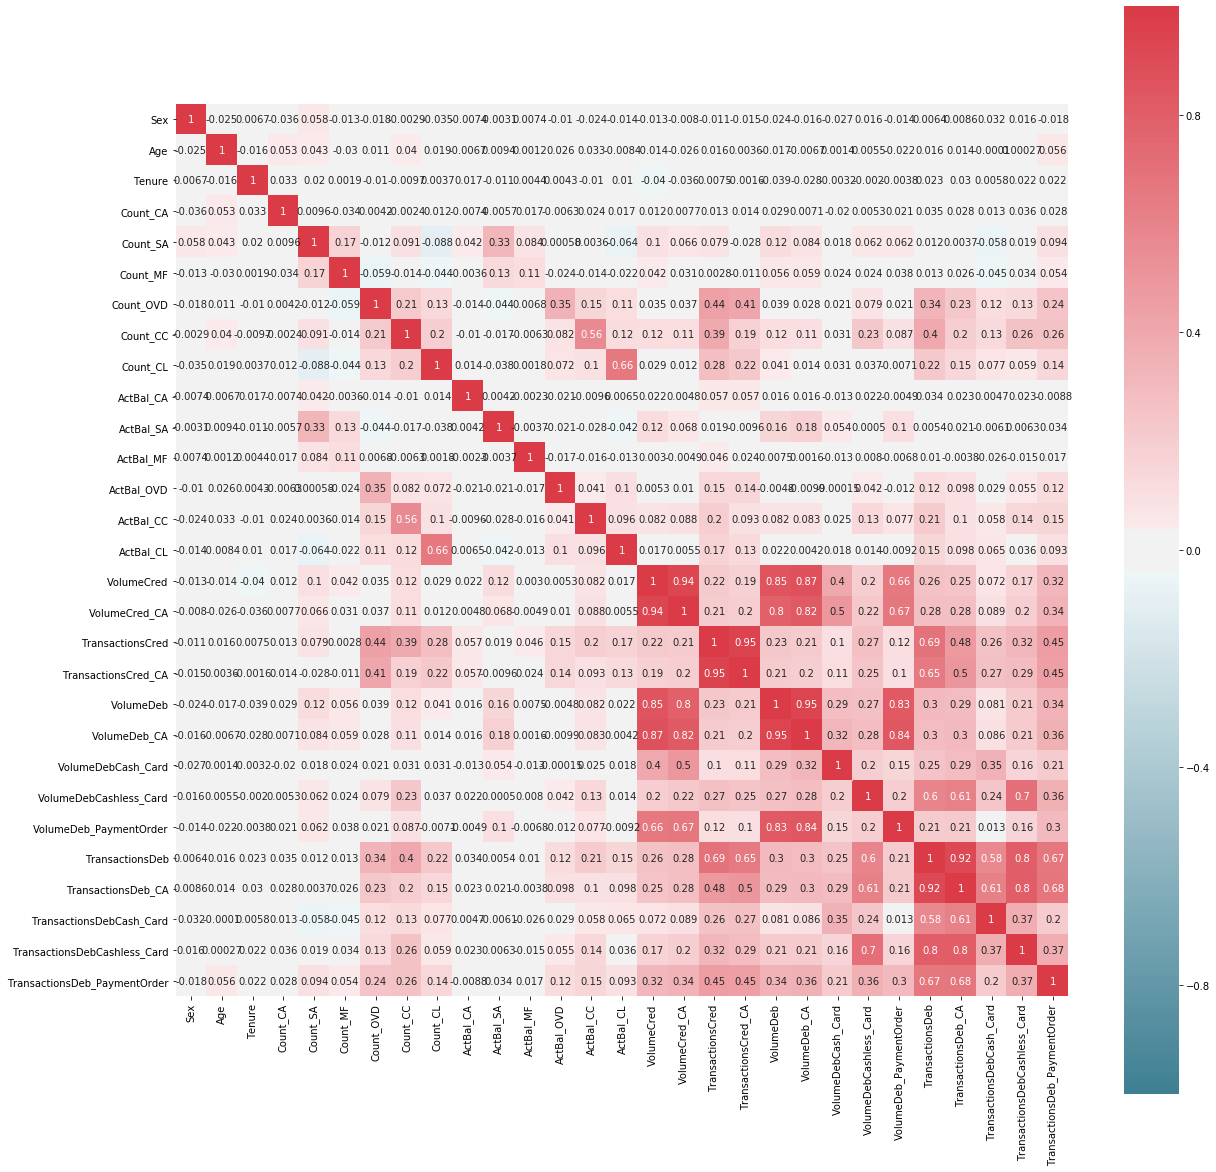

In [16]:
# Check for correlations between features
df_corr = df.drop(['Client'], axis=1).select_dtypes(include=['int64', 'float64'])
corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

In [17]:
corr

,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,...,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Sex,1.000000,-0.025177,0.006675,-0.035666,0.057782,-0.013193,-0.018433,-0.002943,-0.034559,-0.007446,...,-0.024330,-0.015893,-0.027125,0.016021,-0.014204,0.006439,0.008614,0.031682,0.015656,-0.018424
Age,-0.025177,1.000000,-0.015810,0.052542,0.043311,-0.029600,0.011212,0.039633,0.019045,-0.006689,...,-0.017172,-0.006728,0.001375,0.005532,-0.022172,0.016010,0.013775,-0.000104,0.000274,0.056390
Tenure,0.006675,-0.015810,1.000000,0.032972,0.020020,0.001895,-0.010268,-0.009724,0.003673,0.017308,...,-0.038640,-0.027614,-0.003243,-0.001984,-0.003837,0.022507,0.029777,0.005790,0.021928,0.022192
Count_CA,-0.035666,0.052542,0.032972,1.000000,0.009587,-0.033514,0.004200,-0.002384,0.012347,-0.007405,...,0.029244,0.007093,-0.019970,0.005256,0.021334,0.035069,0.028429,0.012763,0.036073,0.027616
Count_SA,0.057782,0.043311,0.020020,0.009587,1.000000,0.169177,-0.012267,0.091418,-0.088484,0.041549,...,0.120893,0.084039,0.017886,0.061902,0.061694,0.011682,0.003664,-0.057651,0.018808,0.094318
Count_MF,-0.013193,-0.029600,0.001895,-0.033514,0.169177,1.000000,-0.059495,-0.013509,-0.043925,-0.003642,...,0.056165,0.059064,0.023996,0.023742,0.037579,0.012606,0.025552,-0.045114,0.033898,0.053825
Count_OVD,-0.018433,0.011212,-0.010268,0.004200,-0.012267,-0.059495,1.000000,0.210968,0.134813,-0.014177,...,0.038694,0.027548,0.020570,0.078865,0.021271,0.335796,0.227667,0.115323,0.125818,0.244719
Count_CC,-0.002943,0.039633,-0.009724,-0.002384,0.091418,-0.013509,0.210968,1.000000,0.202101,-0.010036,...,0.116936,0.108300,0.030550,0.232168,0.086987,0.396369,0.197345,0.130416,0.259013,0.263278
Count_CL,-0.034559,0.019045,0.003673,0.012347,-0.088484,-0.043925,0.134813,0.202101,1.000000,0.013959,...,0.041284,0.014241,0.030837,0.037266,-0.007139,0.223089,0.147061,0.076952,0.059235,0.143084
ActBal_CA,-0.007446,-0.006689,0.017308,-0.007405,0.041549,-0.003642,-0.014177,-0.010036,0.013959,1.000000,...,0.015936,0.015815,-0.013330,0.022468,-0.004928,0.034368,0.022561,0.004686,0.023213,-0.008845


In [18]:
# Remove features with correalation coefficients > 0.8
df.drop(['VolumeCred_CA', 'VolumeDeb_CA', 'TransactionsCred_CA', 'VolumeDeb_PaymentOrder', 'TransactionsDeb_CA', 'TransactionsDebCashless_Card'], axis=1, inplace=True)

In [19]:
df.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card',
       'VolumeDebCashless_Card', 'TransactionsDeb', 'TransactionsDebCash_Card',
       'TransactionsDeb_PaymentOrder'],
      dtype='object')

# Create train and test dataset

In [20]:
df_train = df[df['Client'].isin(df_Sales_Revenues['Client'].unique())]
df_train = pd.merge(df_train, df_Sales_Revenues, on='Client', how='left')
df_test = df[~df['Client'].isin(df_Sales_Revenues['Client'].unique())]

In [21]:
df_train

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDebCashless_Card,TransactionsDeb,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1217,1,38,165,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.0,0.0,1.0,0,0,0,0.000000,0.000000,0.000000
1,850,2,49,44,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,6.0,0.0,1.0,0,1,0,0.000000,0.893929,0.000000
2,1473,1,54,34,1,1.0,0.0,0.0,1.0,1.0,...,444.597500,48.0,1.0,11.0,1,0,0,4.929643,0.000000,0.000000
3,1038,1,29,106,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0,0,0,0.000000,0.000000,0.000000
4,225,1,14,187,1,0.0,0.0,1.0,0.0,0.0,...,111.235714,5.0,0.0,1.0,0,0,1,0.000000,0.000000,8.130714
5,827,1,57,50,1,0.0,0.0,1.0,1.0,0.0,...,17.857143,26.0,4.0,17.0,0,1,1,0.000000,7.928571,12.242143
6,1231,2,6,232,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,9.0,6.0,0.0,0,0,1,0.000000,0.000000,24.434643
7,739,1,69,55,1,1.0,8.0,1.0,0.0,1.0,...,211.182143,7.0,0.0,0.0,0,1,1,0.000000,2.138571,7.785714
8,956,1,52,139,2,0.0,0.0,1.0,0.0,0.0,...,118.721071,27.0,1.0,11.0,0,0,1,0.000000,0.000000,19.958214
9,1219,1,33,19,1,0.0,0.0,0.0,0.0,0.0,...,19.671429,13.0,2.0,5.0,0,0,0,0.000000,0.000000,0.000000


In [22]:
df_test

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,ActBal_CC,ActBal_CL,VolumeCred,TransactionsCred,VolumeDeb,VolumeDebCash_Card,VolumeDebCashless_Card,TransactionsDeb,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder
0,909,1,21,27,1,0.0,0.0,1.0,0.0,1.0,...,0.000000,4291.996429,789.129643,4.0,450.678571,178.571429,0.000000,8.0,1.0,4.0
6,699,1,37,175,1,0.0,4.0,1.0,0.0,0.0,...,0.000000,0.000000,1033.496071,8.0,661.483214,89.285714,0.000000,13.0,2.0,5.0
9,528,2,19,70,1,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,435.682143,2.0,390.056429,125.000000,70.842143,10.0,4.0,2.0
10,1145,1,61,45,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,132.158929,3.0,3.392857,0.000000,0.000000,1.0,0.0,0.0
13,517,2,41,28,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,570.157857,2.0,557.896429,71.428571,224.146429,17.0,2.0,3.0
15,1475,2,59,20,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,794.787857,4.0,855.964286,407.142857,0.000000,10.0,3.0,6.0
16,175,2,41,61,1,0.0,0.0,0.0,0.0,2.0,...,0.000000,20749.294643,676.344286,5.0,569.625357,214.285714,0.000000,8.0,2.0,3.0
26,1134,2,35,96,1,0.0,0.0,1.0,0.0,1.0,...,0.000000,4249.217857,2842.708929,31.0,3054.284643,364.285714,191.778571,66.0,6.0,11.0
30,1218,2,36,49,1,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,250.648929,3.0,3220.535357,0.000000,0.000000,5.0,0.0,3.0
32,7,2,55,227,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,387.504643,2.0,99.043929,17.857143,69.151071,10.0,1.0,1.0


In [23]:
df_train.describe()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDebCashless_Card,TransactionsDeb,TransactionsDebCash_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,...,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,814.609100,1.467425,42.983454,100.408480,1.075491,0.322647,0.985522,0.259566,0.113754,0.091003,...,154.324139,16.052740,1.984488,4.534643,0.199586,0.250259,0.298862,1.928997,2.718437,3.595933
std,465.026627,0.499196,18.595446,65.450752,0.324131,0.578545,4.551499,0.438623,0.317676,0.318498,...,330.866195,16.380324,2.700120,5.226009,0.399896,0.433386,0.457996,9.953503,17.711309,7.741740
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.500000,1.000000,29.000000,42.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,1.000000,41.000000,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.392857,12.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1216.500000,2.000000,57.500000,151.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,180.817143,22.000000,3.000000,7.000000,0.000000,0.500000,1.000000,0.000000,0.035714,4.625000
max,1615.000000,2.000000,90.000000,271.000000,4.000000,3.000000,79.000000,1.000000,1.000000,2.000000,...,3637.616786,102.000000,25.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


# Model development for mutual fund (Sale_MF)

In [24]:
# Step 1: Prepare features and target for mutual fund (Sale_MF)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_MF"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train logistic regression model
log_model_MF = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0) # Use class weights to address class imbalance
#log_model_MF = LogisticRegression(max_iter=1000, random_state=0)
log_model_MF.fit(X_resampled, y_resampled)
#log_model_MF.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = log_model_MF.predict_proba(X_test)[:, 1]
y_pred = log_model_MF.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.6964433416046318
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       155
           1       0.34      0.64      0.44        39

    accuracy                           0.68       194
   macro avg       0.61      0.66      0.61       194
weighted avg       0.77      0.68      0.70       194



/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
# Step 1: Prepare features and target for mutual fund (Sale_MF)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_MF"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train random forest model
rf_model_MF = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight="balanced") # Use class weights to address class imbalance
#rf_model_MF = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_model_MF.fit(X_resampled, y_resampled)
#rf_model_MF.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = rf_model_MF.predict_proba(X_test)[:, 1]
y_pred = rf_model_MF.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.6522746071133168
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       155
           1       0.38      0.13      0.19        39

    accuracy                           0.78       194
   macro avg       0.60      0.54      0.53       194
weighted avg       0.73      0.78      0.74       194



In [26]:
# Step 1: Prepare features and target for mutual fund (Sale_MF)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_MF"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train gradient boosting model
gb_model_MF = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model_MF.fit(X_resampled, y_resampled)
#gb_model_MF.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = gb_model_MF.predict_proba(X_test)[:, 1]
y_pred = gb_model_MF.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.585277088502895
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       155
           1       0.36      0.21      0.26        39

    accuracy                           0.77       194
   macro avg       0.59      0.56      0.56       194
weighted avg       0.73      0.77      0.74       194



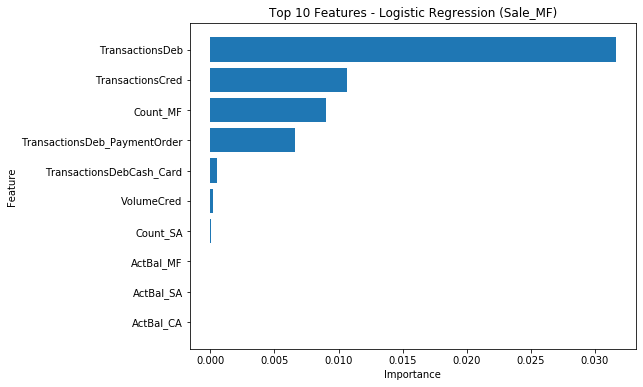

,Feature,Importance
20,TransactionsDeb,3.163025e-02
16,TransactionsCred,1.069081e-02
5,Count_MF,9.015142e-03
22,TransactionsDeb_PaymentOrder,6.631137e-03
21,TransactionsDebCash_Card,5.302924e-04
15,VolumeCred,2.042228e-04
4,Count_SA,4.848277e-05
11,ActBal_MF,1.759265e-07
10,ActBal_SA,-9.368648e-06
9,ActBal_CA,-2.769866e-05


In [27]:
# Extract feature importance from the best model
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": log_model_MF.coef_[0]
}).sort_values(by="Importance", ascending=False)

# Display the top features
feature_importance_top = feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_top["Feature"], feature_importance_top["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features - Logistic Regression (Sale_MF)")
plt.gca().invert_yaxis()
plt.show()

feature_importance_top

# Model development for credit card (Sale_CC)

In [28]:
# Step 1: Prepare features and target for credit card (Sale_CC)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CC"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train logistic regression model
log_model_CC = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0) # Use class weights to address class imbalance
#log_model_CC = LogisticRegression(max_iter=1000, random_state=0)
log_model_CC.fit(X_resampled, y_resampled)
#log_model_CC.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = log_model_CC.predict_proba(X_test)[:, 1]
y_pred = log_model_CC.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.5673469387755101
              precision    recall  f1-score   support

           0       0.79      0.61      0.68       145
           1       0.30      0.51      0.38        49

    accuracy                           0.58       194
   macro avg       0.55      0.56      0.53       194
weighted avg       0.66      0.58      0.61       194



/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
# Step 1: Prepare features and target for credit card (Sale_CC)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CC"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train random forest model
rf_model_CC = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight="balanced") # Use class weights to address class imbalance
#rf_model_CC = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_model_CC.fit(X_resampled, y_resampled)
#rf_model_CC.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = rf_model_CC.predict_proba(X_test)[:, 1]
y_pred = rf_model_CC.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.5819845179451091
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       145
           1       0.48      0.24      0.32        49

    accuracy                           0.74       194
   macro avg       0.63      0.58      0.58       194
weighted avg       0.71      0.74      0.71       194



In [30]:
# Step 1: Prepare features and target for credit card (Sale_CC)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CC"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train gradient boosting model
gb_model_CC = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model_CC.fit(X_resampled, y_resampled)
#gb_model_CC.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = gb_model_CC.predict_proba(X_test)[:, 1]
y_pred = gb_model_CC.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.5327234342012668
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       145
           1       0.31      0.18      0.23        49

    accuracy                           0.69       194
   macro avg       0.53      0.52      0.52       194
weighted avg       0.64      0.69      0.66       194



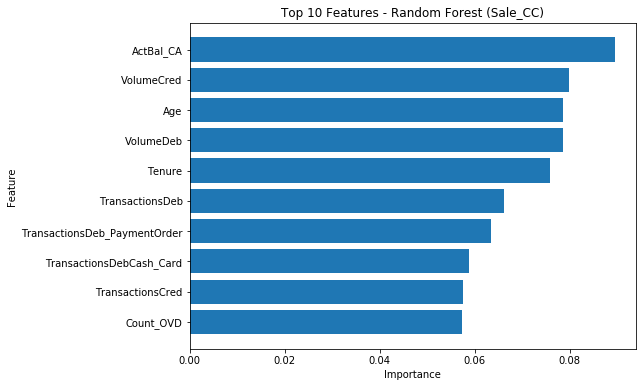

,Feature,Importance
9,ActBal_CA,0.089541
15,VolumeCred,0.079924
1,Age,0.078574
17,VolumeDeb,0.078530
2,Tenure,0.075955
20,TransactionsDeb,0.066207
22,TransactionsDeb_PaymentOrder,0.063445
21,TransactionsDebCash_Card,0.058931
16,TransactionsCred,0.057529
6,Count_OVD,0.057452


In [31]:
# Extract feature importance from the best model
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model_CC.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top features
feature_importance_top = feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_top["Feature"], feature_importance_top["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features - Random Forest (Sale_CC)")
plt.gca().invert_yaxis()
plt.show()

feature_importance_top

# Model development for consumer loan (Sale_CL)

In [32]:
# Step 1: Prepare features and target for consumer loan (Sale_CL)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CL"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train logistic regression model
log_model_CL = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0) # Use class weights to address class imbalance
#log_model_CL = LogisticRegression(max_iter=1000, random_state=0)
log_model_CL.fit(X_resampled, y_resampled)
#log_model_CL.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = log_model_CL.predict_proba(X_test)[:, 1]
y_pred = log_model_CL.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.7307302231237323
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       136
           1       0.45      0.71      0.55        58

    accuracy                           0.65       194
   macro avg       0.64      0.67      0.63       194
weighted avg       0.72      0.65      0.66       194



/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
# Step 1: Prepare features and target for consumer loan (Sale_CL)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CL"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train random forest model
rf_model_CL = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight="balanced") # Use class weights to address class imbalance
#rf_model_CL = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_model_CL.fit(X_resampled, y_resampled)
#rf_model_CL.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = rf_model_CL.predict_proba(X_test)[:, 1]
y_pred = rf_model_CL.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.5966658215010141
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       136
           1       0.42      0.38      0.40        58

    accuracy                           0.66       194
   macro avg       0.58      0.58      0.58       194
weighted avg       0.65      0.66      0.65       194



In [34]:
# Step 1: Prepare features and target for consumer loan (Sale_CL)
features = ['Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL', 
            'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred', 
            'TransactionsCred', 'VolumeDeb', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'TransactionsDeb', 
            'TransactionsDebCash_Card', 'TransactionsDeb_PaymentOrder']

X = df_train[features]
y = df_train["Sale_CL"]

# Step 2: Create train and validation sets, and apply SMOTE to address class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Step 3: Train gradient boosting model
gb_model_CL = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model_CL.fit(X_resampled, y_resampled)
#gb_model_CL.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred_proba = gb_model_CL.predict_proba(X_test)[:, 1]
y_pred = gb_model_CL.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print(auc_score)
print(classification_rep)

0.5584432048681541
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       136
           1       0.35      0.31      0.33        58

    accuracy                           0.62       194
   macro avg       0.53      0.53      0.53       194
weighted avg       0.61      0.62      0.61       194



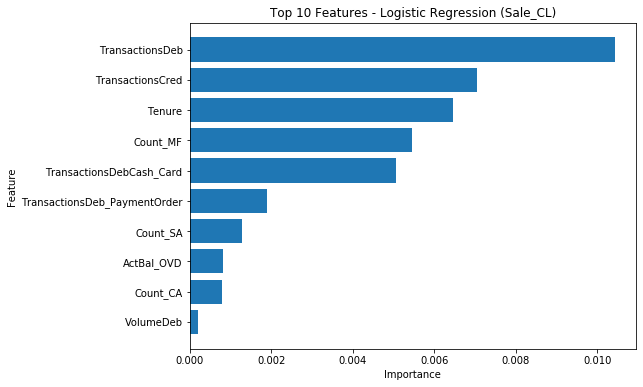

,Feature,Importance
20,TransactionsDeb,0.010429
16,TransactionsCred,0.007056
2,Tenure,0.006451
5,Count_MF,0.005465
21,TransactionsDebCash_Card,0.005063
22,TransactionsDeb_PaymentOrder,0.001908
4,Count_SA,0.001277
12,ActBal_OVD,0.000819
3,Count_CA,0.000798
17,VolumeDeb,0.000202


In [35]:
# Extract feature importance from the best model
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": log_model_CL.coef_[0]
}).sort_values(by="Importance", ascending=False)

# Display the top features
feature_importance_top = feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_top["Feature"], feature_importance_top["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Features - Logistic Regression (Sale_CL)")
plt.gca().invert_yaxis()
plt.show()

feature_importance_top

# Targeting strategy

In [36]:
# Predict propensity scores for all clients for each product (based on the model performance, logistic regression model is chosen for Sale_MF and Sale_CL, and random forest model is chosen for Sale_CC)
df_test["Propensity_MF"] = log_model_MF.predict_proba(df_test[features])[:, 1]  # Mutual Fund
df_test["Propensity_CC"] = rf_model_CC.predict_proba(df_test[features])[:, 1]  # Credit Card
df_test["Propensity_CL"] = log_model_CL.predict_proba(df_test[features])[:, 1]  # Consumer Loan

# elect the top clients for each offer (15% of clients, ~100 individuals total)
n_clients = 100
top_clients_mf = df_test.nlargest(n_clients, "Propensity_MF")[["Client", "Propensity_MF"]]
top_clients_cc = df_test.nlargest(n_clients, "Propensity_CC")[["Client", "Propensity_CC"]]
top_clients_cl = df_test.nlargest(n_clients, "Propensity_CL")[["Client", "Propensity_CL"]]

# Combine into a single targeted client list
targeted_clients = pd.concat([
    top_clients_mf.rename(columns={"Propensity_MF": "Propensity"}).assign(Offer="Mutual Fund"),
    top_clients_cc.rename(columns={"Propensity_CC": "Propensity"}).assign(Offer="Credit Card"),
    top_clients_cl.rename(columns={"Propensity_CL": "Propensity"}).assign(Offer="Consumer Loan")
])

# Sort by propensity within each offer and remove duplicated clients, keeping the offer with the highest propensity
targeted_clients = targeted_clients.sort_values(by="Propensity", ascending=False)
targeted_clients = targeted_clients.drop_duplicates(subset="Client", keep="first")
targeted_clients = targeted_clients.nlargest(n_clients, "Propensity")[["Client", "Propensity", "Offer"]].reset_index(drop=True)

# Display the targeted client list
tools.display_dataframe_to_user(name="Targeted Client List for Marketing Offers", dataframe=targeted_clients)

/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ronaldwihaloei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Targeted Client List for Marketing Offers


In [37]:
# Define assumed revenue values for each offer type (for simplicity, assume as the mean of Revenue_MF, Revenue_CC and Revenue_CL, respectively)
revenue_per_offer = {
    "Mutual Fund": df_train.loc[df_train['Sale_MF'] == 1]["Revenue_MF"].mean(),
    "Credit Card": df_train.loc[df_train['Sale_CC'] == 1]["Revenue_CC"].mean(),
    "Consumer Loan": df_train.loc[df_train['Sale_CL'] == 1]["Revenue_CL"].mean()
}

# Calculate expected revenue for each client in the targeted list
targeted_clients["Revenue"] = targeted_clients["Offer"].map(revenue_per_offer)
targeted_clients["Expected_Revenue"] = targeted_clients["Propensity"] * targeted_clients["Revenue"]

# Calculate the total estimated revenue
total_estimated_revenue = targeted_clients["Expected_Revenue"].sum()

# Display the final list with revenue details
tools.display_dataframe_to_user(
    name="Final Targeted Client List with Revenue Calculation", dataframe=targeted_clients
)

# Output the total estimated revenue
print("Total estimated revenue: " + str(total_estimated_revenue))

Final Targeted Client List with Revenue Calculation


Total estimated revenue: 869.451686997107
